## Importing Libraries

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## Load Data

In [2]:
import os
os.chdir("/content/drive/MyDrive/Deep Learning/4. ANN for Close Price Prediction")

In [3]:
!dir

data.csv				Neural\ Network_Problem\ Statement.pdf
Neural\ Network\ for\ Regression.ipynb


In [5]:
data=pd.read_csv("data.csv")

In [6]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-08-27,9982.179688,10159.879883,9936.620117,10150.650391,10150.650391,207760000
1,2010-08-30,10145.580078,10150.570313,10007.679688,10009.730469,10009.730469,150480000
2,2010-08-31,10006.419922,10073.379883,9941.839844,10014.719727,10014.719727,255420000
3,2010-09-01,10016.009766,10279.080078,10016.009766,10269.469727,10269.469727,205710000
4,2010-09-02,10270.080078,10320.370117,10253.959961,10320.099609,10320.099609,149930000


## Data Preparation 
The process of data preparation entails cleansing, structuring and integrating data to make it ready for analysis. Here we first analyze the data statstically and then split the largest variables and normalize, followed by splitting the dataframe into numerical and categorical features. **
<br>
## Dimensions of Dataset
We can get a quik of how many instances (rows) amd how many attributes(columns) the data ciontains the shape property.**

In [7]:
#shape
data.shape

(2014, 7)

# Statistical Summary
we can take a look at a summary  of each attribute.

This includes the count, mean, the min and max values as well as some percentiles. 

In [8]:
#Discription
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2.014000e+03
mean,16756.880170,16835.962791,16676.660195,16762.755255,16762.755255,1.699523e+08
std,3985.884743,3992.888506,3977.350484,3984.242430,3984.242430,1.072222e+08
min,9982.179688,10073.379883,9936.620117,10009.730469,10009.730469,8.410000e+06
25%,13104.239746,13175.674805,13045.425049,13107.277588,13107.277588,9.486500e+07
50%,16566.544922,16652.890625,16500.360352,16571.265625,16571.265625,1.284750e+08
75%,18282.699219,18350.062988,18205.062500,18287.908203,18287.908203,2.177400e+08
max,26584.279297,26616.710938,26435.339844,26616.710938,26616.710938,8.239400e+08


## Spliting Target Variable

In [11]:
Predictor=data.iloc[:,[1,2,3,5,6]]
target=data.iloc[:,4]

## Standarize Feature

In [12]:
scaler=StandardScaler()
Predictor=scaler.fit_transform(Predictor)

## **Train, Test Data Split**

In [14]:
#we are spliting the data set into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(Predictor,target,test_size=0.30,random_state=0)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)


x_train (1409, 5)
x_test (605, 5)
y_train (1409,)
y_test (605,)


# **Neural Network**

In [15]:
#import neural network library
from sklearn.neural_network import MLPRegressor
import sklearn.neural_network

In [16]:
sklearn.neural_network.BernoulliRBM.score_samples?

In [17]:
dir(sklearn.neural_network.BernoulliRBM.score_samples)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [19]:
#Build model with neural_network
nn_model=MLPRegressor().fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [23]:
#Predict using Built model
predictvalues=nn_model.predict(x_test)

In [24]:
# coefficient of determination of R^2 of the predicted model
nn_model.score(x_train,y_train)

-15.796968547192645

In [25]:
#check RMSE (Root Mean Square Error)
from sklearn.metrics import mean_squared_error
import math
print(math.sqrt(mean_squared_error(y_test,predictvalues)))

16152.096348910101


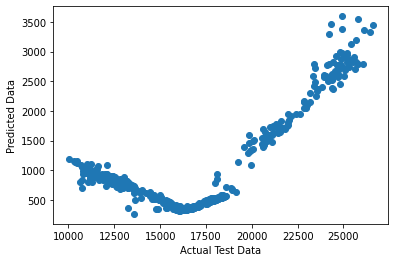

In [27]:
#checking scatter of data between y_test and predicted values
plt.scatter(y_test,predictvalues)
plt.xlabel("Actual Test Data")
plt.ylabel("Predicted Data")
plt.show()

# **Build Model with Neural Network**

with Hidden layers, Activation function, Solver and learning Rate

In [29]:
nn_model=MLPRegressor(hidden_layer_sizes=(10,15,10), activation='relu',solver='lbfgs',alpha=0.001,
                      learning_rate='adaptive',random_state=0).fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [34]:
#Predict using built model
predictvalues=nn_model.predict(x_test)

In [32]:
#coefficient of determination R^2 of the predicted model
nn_model.score(x_train,y_train)

0.9999999771407247

In [35]:
#check RMSE (Root Mean Squared Error)
from sklearn.metrics import mean_squared_error
import math
print(math.sqrt(mean_squared_error(y_test,predictvalues)))

0.6219343399134329


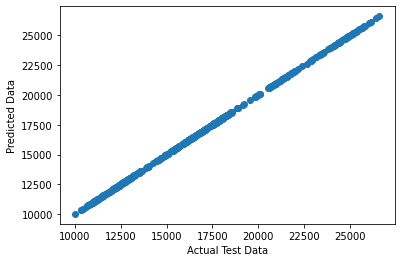

In [36]:
#Checking scatter of data between Y_test and predicted values
plt.scatter(y_test,predictvalues)
plt.xlabel("Actual Test Data")
plt.ylabel("Predicted Data")
plt.show()